In [2]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Library
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model


In [4]:
# Load data in Drive, make train data and validation data
train_datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI_19146301/Fruit/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical',
                                               subset = 'training',
                                               shuffle = True)
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI_19146301/Fruit/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical',
                                               subset = 'validation',
                                               shuffle = True)
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AI_19146301/Fruit/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')


Found 379 images belonging to 5 classes.
Found 92 images belonging to 5 classes.
Found 0 images belonging to 0 classes.


In [48]:
# Assigning names of data
class_name = ['Dragon Fruit','Mango','Orange','Plum', 'StarFruit']
training_set.class_indices

{'DragonFruit': 0, 'Mango': 1, 'Orange': 2, 'Plum': 3, 'StarFruit': 4}

In [52]:
# Define the convolutional neural network architecture
model=Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256,3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='softmax'))

opt = SGD(lr =0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [53]:
# Compiling Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
# Traning data to the model
history = model.fit(training_set,batch_size=64,epochs=7,verbose=1,validation_data=validation_set)

Epoch 1/7
12/12 [==============================] - 129s 11s/step - loss: 19.1597 - accuracy: 0.2296 - val_loss: 1.5961 - val_accuracy: 0.2717
Epoch 2/7
12/12 [==============================] - 122s 10s/step - loss: 1.5795 - accuracy: 0.3034 - val_loss: 1.5677 - val_accuracy: 0.3043
Epoch 3/7
12/12 [==============================] - 127s 11s/step - loss: 1.4368 - accuracy: 0.4116 - val_loss: 1.4087 - val_accuracy: 0.4239
Epoch 4/7
12/12 [==============================] - 122s 10s/step - loss: 0.9894 - accuracy: 0.6755 - val_loss: 1.0513 - val_accuracy: 0.6196
Epoch 5/7
12/12 [==============================] - 122s 10s/step - loss: 0.4420 - accuracy: 0.8496 - val_loss: 0.7169 - val_accuracy: 0.6957
Epoch 6/7
12/12 [==============================] - 122s 10s/step - loss: 0.1606 - accuracy: 0.9604 - val_loss: 0.6359 - val_accuracy: 0.8152
Epoch 7/7
12/12 [==============================] - 124s 10s/step - loss: 0.0701 - accuracy: 0.9868 - val_loss: 0.7445 - val_accuracy: 0.7609


In [60]:
# Evaluating the model for testing data
test_loss, test_acc = model.evaluate(validation_set)
print(f"Test lost: {test_loss}")
print(f"Accuracy: {test_acc}")

3/3 [==============================] - 7s 2s/step - loss: 0.7445 - accuracy: 0.7609
Test lost: 0.7444528341293335
Accuracy: 0.760869562625885


In [56]:
# Save model
model.save('/content/drive/MyDrive/CNN_MODEL/Fruit_CNN.h5')

In [57]:
# Load model
model_load = tf.keras.models.load_model('Fruit_CNN.h5')

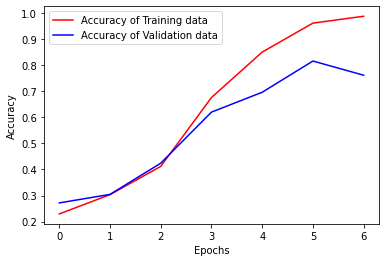

<Figure size 432x288 with 0 Axes>

In [58]:
# Plot the train, val accuracies
train_acc=history.history['accuracy']    
val_acc=history.history['val_accuracy']      
plt.plot(train_acc, 'r', label='Accuracy of Training data')
plt.plot(val_acc, 'b', label='Accuracy of Validation data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

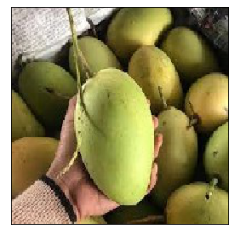

Mango


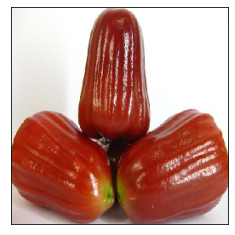

Plum


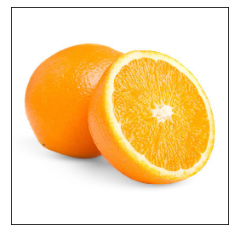

Orange


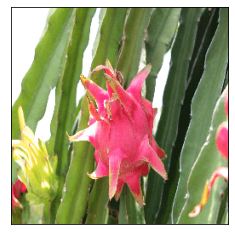

Dragon Fruit


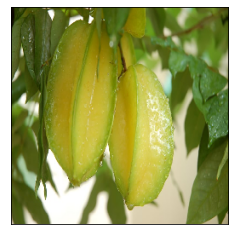

StarFruit


In [59]:
# Predicting the data
dir = '/content/drive/MyDrive/AI_19146301/Fruit/test'
for i in os.listdir(dir):
  img = load_img(dir +'/'+ i, target_size=(256,256))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.show()
  img = img_to_array(img)
  img = img.reshape(1,256,256,3)
  img = img.astype('float32')
  img = img/255
  val=np.argmax(model_load.predict(img))
  print(class_name[val])